In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
from sklearn.externals import joblib
from tqdm import tqdm

In [2]:
DATADIR = "im_base_to_angle/r_d_i_pa/train"

In [64]:
DATADIR = "im_base_to_angle/DI_PA_Test/test"

In [2]:
DATADIR = "im_base_to_angle/rotated_5_pa/test"

In [3]:
CATEGORIES_INT = [i for i in range(1, 361)]
CATEGORIES = [str(item) for item in CATEGORIES_INT]
# map(str, CATEGORIES)
# print(CATEGORIES)

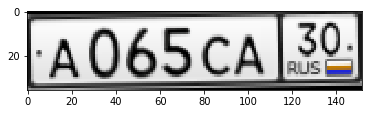

In [4]:
for category in CATEGORIES:  # do dogs and cats
    path = os.path.join(DATADIR,category)  # create path to dogs and cats
    for img in os.listdir(path):  # iterate over each image per dogs and cats
        img_array = cv2.imread(os.path.join(path,img))  # convert to array
        plt.imshow(img_array, cmap='gray')  # graph it
        plt.show()  # display!

        break  # we just want one for now so break
    break  #...and one more!

In [5]:
print(img_array)

[[[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [ 87  87  87]
  [127 127 127]
  [115 115 115]]

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [ 40  40  40]
  [ 48  48  48]
  [ 41  41  41]]

 [[129 129 129]
  [ 83  83  83]
  [ 69  69  69]
  ...
  [ 88  88  88]
  [ 25  25  25]
  [ 18  18  18]]

 ...

 [[ 29  29  29]
  [ 34  34  34]
  [ 48  48  48]
  ...
  [126 126 126]
  [129 129 129]
  [129 129 129]]

 [[ 81  81  81]
  [ 58  58  58]
  [ 30  30  30]
  ...
  [  0   0   0]
  [  0   0   0]
  [  0   0   0]]

 [[126 126 126]
  [149 149 149]
  [135 135 135]
  ...
  [  0   0   0]
  [  0   0   0]
  [  0   0   0]]]


In [6]:
print(img_array.shape)

(36, 152, 3)


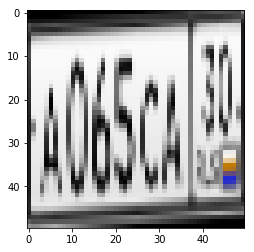

In [7]:
IMG_SIZE = 50

new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
plt.imshow(new_array, cmap='gray')
plt.show()

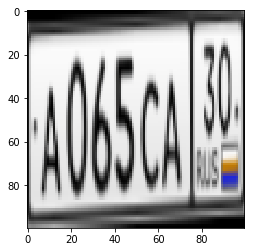

In [8]:
IMG_SIZE = 100

new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
plt.imshow(new_array, cmap='gray')
plt.show()

In [19]:
training_data = []

In [20]:
def create_training_data():
    for category in CATEGORIES:  # do dogs and cats

        path = os.path.join(DATADIR,category)  # create path to dogs and cats
        class_num = CATEGORIES.index(category)  # get the classification  (0 or a 1). 0=dog 1=cat

        for img in tqdm(os.listdir(path)):  # iterate over each image per dogs and cats
            try:
                img_array = cv2.imread(os.path.join(path,img))  # convert to array
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))  # resize to normalize data size
                path_to_img = os.path.join(path,img)
                training_data.append([new_array, class_num, path_to_img])  # add this to our training_data
            except Exception as e:  # in the interest in keeping the output clean...
                pass
            #except OSError as e:
            #    print("OSErrroBad img most likely", e, os.path.join(path,img))
            #except Exception as e:
            #    print("general exception", e, os.path.join(path,img))

In [21]:
create_training_data()

100%|██████████| 5/5 [00:00<00:00, 2058.25it/s]


In [12]:
print(len(training_data))

1800


In [22]:
import random

In [23]:
random.shuffle(training_data)

In [24]:
for sample in training_data[:10]:
    print(sample[1])

314
201
29
178
217
55
34
124
348
68


In [25]:
X = []
Y = []
Z = []

In [26]:
for features,label, path in training_data:
    X.append(features)
    Y.append(label)
    Z.append(path)

In [ ]:
# print(X[0].reshape(-1, IMG_SIZE, IMG_SIZE, 3))

In [28]:
filename = 'trained_data/X_CI_pa_3ch_test.sav'
joblib.dump(X, filename)

['trained_data/X_CI_pa_3ch_test.sav']

In [ ]:
loaded_X = joblib.load(filename)
print(loaded_X[0])

In [27]:
X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 3)

In [20]:
print(X[0].shape)

(100, 100, 3)


In [29]:
filename = 'trained_data/Y_CI_pa_3ch_test.sav'
joblib.dump(Y, filename)

['trained_data/Y_CI_pa_3ch_test.sav']

In [30]:
filename = 'trained_data/Z_CI_pa_3ch_test.sav'
joblib.dump(Z, filename)

['trained_data/Z_CI_pa_3ch_test.sav']